In [2]:
#%matplotlib notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2
import scipy.integrate as integrate

import os
import os.path as path
import wget

from tqdm import tqdm
#import corner

In [3]:
sample = np.array([0.974,0.950,0.932,1.104,1.038,0.920,0.935,0.907,0.810,0.915])

Mean:  0.9484999999999999


(array([1., 0., 0., 3., 3., 1., 0., 1., 0., 1.]),
 array([0.81  , 0.8394, 0.8688, 0.8982, 0.9276, 0.957 , 0.9864, 1.0158,
        1.0452, 1.0746, 1.104 ]),
 <BarContainer object of 10 artists>)

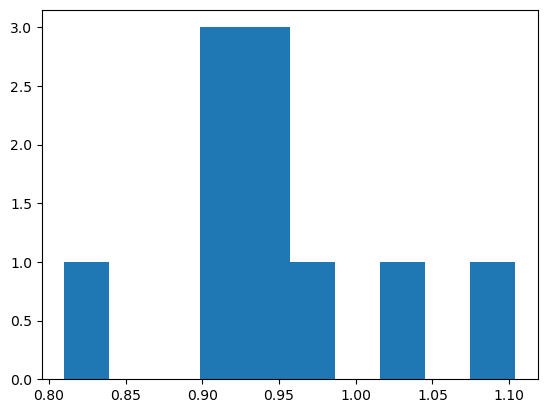

In [4]:
print('Mean: ',np.mean(sample))
plt.hist(sample)

In [5]:
def Resample(sample):
    # se toma cualquier valor de la muestra y se intercambia de forma aleatoria
    resample_ = np.random.choice(sample, size=len(sample), replace=True)
    return resample_

In [6]:
np.mean(Resample(sample))

0.9032

In [7]:
# ahora se hace montecarlo
def Bootstrapping(sample, N=100000):
    Mean_Dist = np.zeros(N)
    
    for i in tqdm(range(N)):
        resample_ = Resample(sample)
        Mean_Dist[i] = np.mean(resample_)
    return Mean_Dist

In [8]:
Mean_Dist = Bootstrapping(sample)

100%|████████████████████████████████| 100000/100000 [00:01<00:00, 54357.54it/s]


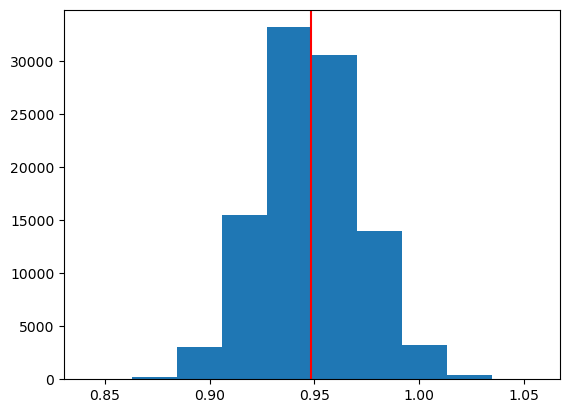

In [9]:
plt.hist(Mean_Dist)
plt.axvline(x=np.mean(sample), color='r')

In [10]:
std = np.std(Mean_Dist)
mean = np.mean(Mean_Dist)
std, mean

(0.02368245717715911, 0.948428795)

In [11]:
def Gaussian(x,mu,sigma):
    return np.exp( -(x-mu)**2/(2*sigma**2) )/np.sqrt(2*np.pi*sigma**2)

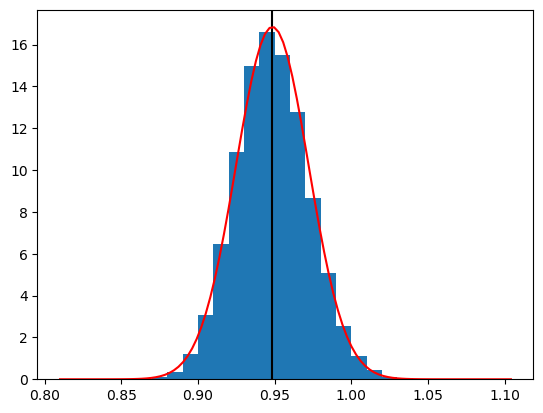

In [12]:
x = np.linspace(np.min(sample),np.max(sample),100)
y = Gaussian(x,np.mean(Mean_Dist),std)

plt.axvline(x=np.mean(sample), color='k')
plt.hist(Mean_Dist,bins=np.arange(np.min(sample),np.max(sample),0.01),density=True)
plt.plot(x,y,color='r')

In [ ]:
# NEWTON RHAPSON GENERALIZADO